In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

### Load filtered_df
df = pd.read_csv("/home/mouren/Data/valid_exp/summary_count_exonhancers_bilan.tsv", sep="\t", header=0)
df = df[~df['Log2FC'].str.contains('#', na=False)] # Remove rows with no log2FC values 

df["Log2FC"] = df["Log2FC"].str.replace(',', '.')
df["Input_STD"] = df["Input_STD"].str.replace(',', '.')

df["Log2FC"] = pd.to_numeric(df["Log2FC"])
df["count_sequence_AVO4Exonhmaxi4"] = pd.to_numeric(df["count_sequence_AVO4Exonhmaxi4"])
df["Input_STD"] = pd.to_numeric(df["Input_STD"])

# removes input count reads less than 500 and standard deviation above 20
filtered_df = df[(df['count_sequence_AVO4Exonhmaxi4'] >= 500) & (df['Input_STD'] <= 20) & (df['Category2'] == "EEK")]

# Sort the DataFrame by Log2FC values
df_sorted = filtered_df.sort_values(by='Log2FC', ascending=True).reset_index(drop=True)

# Determine the range
min_value = df_sorted['Log2FC'].min()
max_value = df_sorted['Log2FC'].max()

# Set symmetric bounds around zero
abs_max = max(abs(min_value), abs(max_value))

# Use TwoSlopeNorm with symmetric bounds
norm = mcolors.TwoSlopeNorm(vmin=-abs_max, vcenter=0, vmax=abs_max)

# Create a colormap object
cmap = cm.get_cmap('coolwarm')

# Apply the colormap to the normalized Log2FC values
df_sorted['Color'] = df_sorted['Log2FC'].apply(lambda x: mcolors.rgb2hex(cmap(norm(x))))

/tmp/ipykernel_1728479/1006117015.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


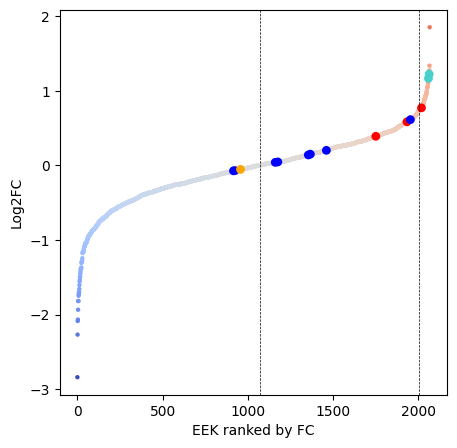

In [3]:
### ALL EEK
plt.figure(figsize=(5, 5))
sc = plt.scatter(range(len(df_sorted)), df_sorted['Log2FC'], c=df_sorted['Log2FC'], cmap='coolwarm', marker='o', s=10, edgecolor='none', norm=norm)

# Adding luciferase
good_luc = ['ENST00000299505.8_cds_5_EEK','ENST00000347529.7_cds_7_EEK','ENST00000373790.9_cds_21_EEK','ENST00000440232.7_cds_19_EEKAG']
mid_luc = ['ENST00000369611.4_cds_15_EEK',]
bad_luc = ['ENST00000406875.8_cds_10_EEKA','ENST00000398263.6_cds_2_EEKG', 'ENST00000254963.7_cds_4_EEKAG', 'ENST00000366993.7_cds_5_EEK','ENST00000311117.8_cds_19_EEK', 'ENST00000375719.7_cds_11_EEK', 'ENST00000313663.11_cds_20_EEK', 'ENST00000192788.6_cds_6_EEK']

crispr_targer = ["ENST00000456909.6_cds_13_EEK","ENST00000299886.9_cds_6_EEKG"]

for i in df_sorted.index:
    if df_sorted.loc[i, 'ID'] in good_luc:
        plt.scatter(i, df_sorted.loc[i, 'Log2FC'], marker='o', color='red', s=40, edgecolor='none')
    elif df_sorted.loc[i, 'ID'] in mid_luc:
        plt.scatter(i, df_sorted.loc[i, 'Log2FC'], marker='o', color='orange', s=40, edgecolor='none')
    elif df_sorted.loc[i, 'ID'] in bad_luc:
        plt.scatter(i, df_sorted.loc[i, 'Log2FC'], marker='o', color='blue', s=40, edgecolor='none')
    elif df_sorted.loc[i, 'ID'] in crispr_targer:
        plt.scatter(i, df_sorted.loc[i, 'Log2FC'], marker='o', color='mediumturquoise', s=40, edgecolor='none')

plt.xlabel('EEK ranked by FC')
plt.ylabel('Log2FC')

plt.axvline(x = 1070, color = 'k', linestyle='--', linewidth=0.5) 
plt.axvline(x = 2007, color = 'k', linestyle='--', linewidth=0.5) 

plt.savefig("/home/mouren/Images/tls1/main_figures/fig4/starr_fc_ranked.pdf", format="pdf", bbox_inches="tight")
plt.savefig("/home/mouren/Images/tls1/main_figures/fig4/starr_fc_ranked.png", format="png", bbox_inches="tight")
plt.show()

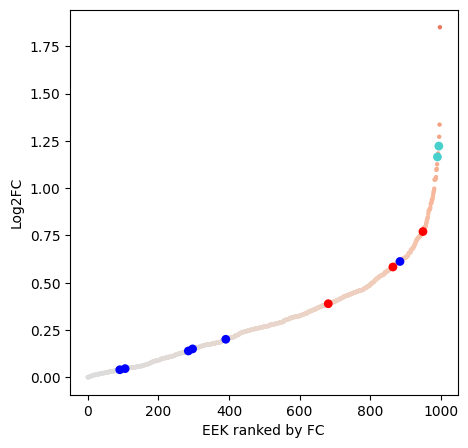

In [11]:
plt.figure(figsize=(5, 5))
df_sorted2 = df_sorted[(df_sorted['Log2FC'] >= 0)]
df_sorted2 = df_sorted2.reset_index(drop=True)

sc = plt.scatter(range(len(df_sorted2)), df_sorted2['Log2FC'], c=df_sorted2['Color'], marker='o', s=10, edgecolor='none')

# Adding red markers for specific IDs
good_luc = ['ENST00000299505.8_cds_5_EEK','ENST00000347529.7_cds_7_EEK','ENST00000373790.9_cds_21_EEK','ENST00000440232.7_cds_19_EEKAG']
mid_luc = ['ENST00000369611.4_cds_15_EEK',]
bad_luc = ['ENST00000406875.8_cds_10_EEKA','ENST00000398263.6_cds_2_EEKG', 'ENST00000254963.7_cds_4_EEKAG', 'ENST00000366993.7_cds_5_EEK','ENST00000311117.8_cds_19_EEK', 'ENST00000375719.7_cds_11_EEK', 'ENST00000313663.11_cds_20_EEK', 'ENST00000192788.6_cds_6_EEK']

crispr_targer = ["ENST00000456909.6_cds_13_EEK","ENST00000299886.9_cds_6_EEKG"]

for i in df_sorted2.index:
    if df_sorted2.loc[i, 'ID'] in good_luc:
        plt.scatter(i, df_sorted2.loc[i, 'Log2FC'], marker='o', color='red', s=40, edgecolor='none')
    elif df_sorted2.loc[i, 'ID'] in mid_luc:
        plt.scatter(i, df_sorted2.loc[i, 'Log2FC'], marker='o', color='orange', s=40, edgecolor='none')
    elif df_sorted2.loc[i, 'ID'] in bad_luc:
        plt.scatter(i, df_sorted2.loc[i, 'Log2FC'], marker='o', color='blue', s=40, edgecolor='none')
    elif df_sorted2.loc[i, 'ID'] in crispr_targer:
        plt.scatter(i, df_sorted2.loc[i, 'Log2FC'], marker='o', color='mediumturquoise', s=40, edgecolor='none')

plt.xlabel('EEK ranked by FC')
plt.ylabel('Log2FC')

plt.savefig("/home/mouren/Images/tls1/main_figures/fig4/starr_fc_ranked_strong_only.pdf", format="pdf", bbox_inches="tight")
plt.savefig("/home/mouren/Images/tls1/main_figures/fig4/starr_fc_ranked_strong_only.png", format="png", bbox_inches="tight")
plt.show()